In [1]:
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import PIL

from pathlib import Path

from fastai import *
from fastai.vision import *

# Data Analysis
Mediocre. Mostly useless. Just skip it.

In [3]:
ds_path = Path('../datasets/lfw')    # The LFW Dataset root directory
photos_dir_path = Path('../photos')  # A folder with a few old photos

In [4]:
def plot_img_sizes(folder: Path, img_ext: str = 'jpg', up_to: Optional[int] = None,
                   plot_dist: bool = False, figsize: Tuple[int, int] = (3, 5)) -> None:
    def sort_and_plot(l, ax, title):
        y = np.array(l)
        y[::-1].sort()
        x = np.arange(len(y)) 
        sns.lineplot(x, y, ax=ax).set_title(title)
    
    width_list, height_list = [], []
    images = folder.glob(f'**/*.{img_ext}')
    for i, img_path in enumerate(images):
        if up_to is not None and i >= up_to:
            break
        img = PIL.Image.open(img_path)
        width, height = img.size
        img.close()
        width_list.append(width)
        height_list.append(height)
    
    _, axes = plt.subplots(nrows=2, sharex=True, figsize=figsize)
    if plot_dist:
        sns.distplot(width_list, kde=False, ax=axes[0]).set_title('width distribution')
        sns.distplot(height_list, kde=False, ax=axes[1]).set_title('height distribution')
    else:
        sort_and_plot(width_list, axes[0], 'width')
        sort_and_plot(height_list, axes[1], 'height')
    plt.show()


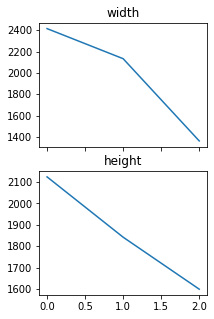

In [5]:
plot_img_sizes(photos_dir_path)

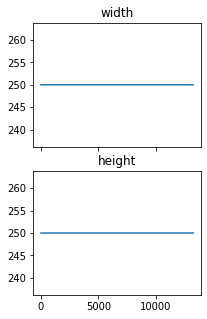

In [6]:
plot_img_sizes(ds_path)

In [7]:
def plot_color_dist(folder: Path, img_ext: str = 'jpg', up_to: Optional[int] = None,
                    img_average: bool = True, resize_to: Optional[Tuple[int, int]] = None,
                    figsize: Tuple[int, int] = (12, 5)) -> None:
    rvalues, gvalues, bvalues = [], [], []
    images = folder.glob(f'**/*.{img_ext}')
    for i, img_path in enumerate(images):
        if up_to is not None and i >= up_to:
            break
        img_source = PIL.Image.open(img_path)
        if resize_to is None:
            img = np.array(img_source)
        else:
            img = np.array(img_source.resize(resize_to))
        img_source.close()
        
        if img_average:
            rvalues.append(np.mean(img[:, :, 0]))
            gvalues.append(np.mean(img[:, :, 1]))
            bvalues.append(np.mean(img[:, :, 2]))
        else:
            rvalues.extend(img[:, :, 0].flatten())
            gvalues.extend(img[:, :, 1].flatten())
            bvalues.extend(img[:, :, 2].flatten())
        
    _, axes = plt.subplots(ncols=3, sharey=True, figsize=figsize)
    sns.distplot(rvalues, ax=axes[0]).set_title('red channel')
    sns.distplot(gvalues, ax=axes[1]).set_title('green channel')
    sns.distplot(bvalues, ax=axes[2]).set_title('blue channel')
    plt.show()


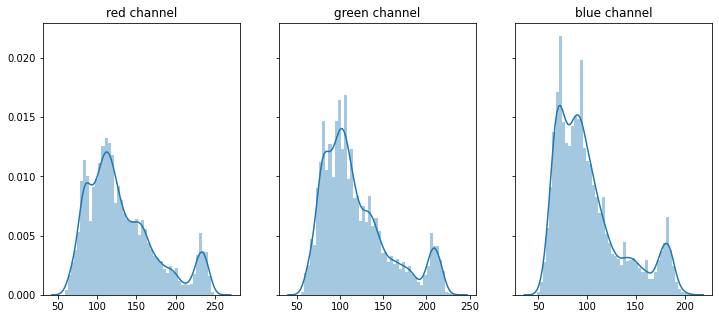

In [8]:
plot_color_dist(photos_dir_path, up_to=3, img_average=False, resize_to=(100, 100))

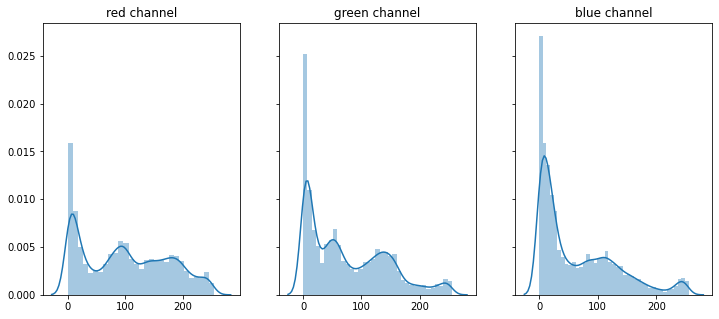

In [9]:
plot_color_dist(ds_path, up_to=3, img_average=False, resize_to=(100, 100))